In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import scipy

In [2]:
def vec_mod(n):
    return math.sqrt(sum([i ** 2 for i in n]))


def inverse_eig_2(a, iterations, epsilon, par):
    b  = a - par * np.diag(np.ones(a.shape[0]))
    (lu, piv) = scipy.linalg.lu_factor(b)
    
    x = np.random.rand(a.shape[0])
    x = x / np.linalg.norm(x)
    i = 0
    
    while (i < iterations):
        xtmp = x
        w = scipy.linalg.lu_solve((lu, piv), x)
        x = w / np.linalg.norm(w)
        l = np.transpose(x) @ a @ x
        if 2 - vec_mod(xtmp - x) < epsilon:
            break
        i += 1
    return l, x, i

In [3]:
def gen_matrix(n):
    return [[0 for i in range(n)] for j in range(n)]

In [4]:
def read_graph(path, g):
    file = open(path, 'r')
    for line in file:
        words = line.split()
        g[int(words[0])][int(words[1])] = 1        

In [5]:
def read_max_from(path):
    file = open(path, 'r')
    m = 0
    for line in file:
        words = line.split()
        for w in words:
            wl = int(w)
            if wl > m:
                m = wl
    return m    

In [6]:
def get_succ(g, v): # F
    succ = []
    for i in range(len(g)):
        if g[v][i] != 0:
            succ.append(i)
    return succ

In [7]:
def get_pred(g, v): # B
    pred = []
    for i in range(len(g)):
        if g[i][v] != 0:
            pred.append(i)
    return pred

In [8]:
def v_norm(g, v):
    n = len(get_succ(g, v))
    return n

In [9]:
def g_norm(g):
    n = len(g)
    for r in range(n):
        for c in range(n):
            if g[r][c] == 1:
                g[r][c] /= v_norm(g, r)

In [10]:
def r_fun(g, u, c):
    if (get_pred(g, u) == []):
        return 1.0
    pred = get_pred(g, u)
    return c * sum([r_fun(g, v, c) / v_norm(g, v) for v in pred if v_norm(g,v) != 0])

In [11]:
def plot_graph(g, n):
    G = nx.to_networkx_graph(np.array(g), create_using=nx.DiGraph())
    plt.figure(figsize=(n, n))
    nx.draw(G, with_labels=True)
    plt.show()

In [12]:
g = gen_matrix(5)
read_graph("in.txt", g)
g_norm(g)
print(np.array(g))

[[ 0.   0.5  0.   0.5  0. ]
 [ 0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   0.   0. ]]


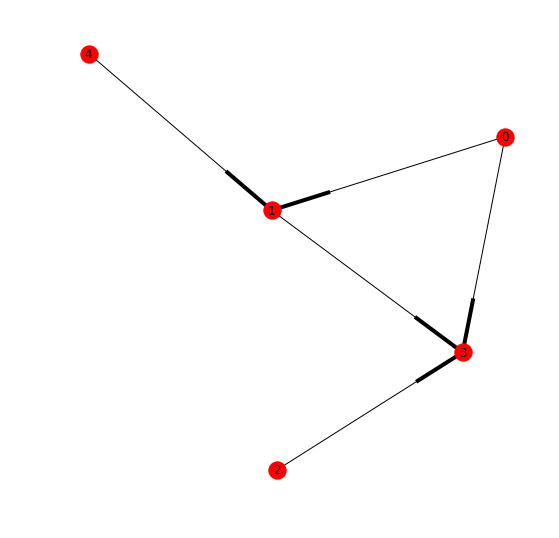

In [13]:
plot_graph(g, 7)

In [14]:
c = 1.0
ranking = [r_fun(g, u, c) for u in range(5)]
m = max(ranking)
R = [e/m for e in ranking]
print(R)

[0.3333333333333333, 0.5, 0.3333333333333333, 1.0, 0.3333333333333333]


In [15]:
from pagerank import *

In [16]:
g2 = gen_matrix(8)
read_graph("in2.txt", g2)
#g_norm(g2)
print(np.array(g2))


[[0 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0]
 [0 1 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]]


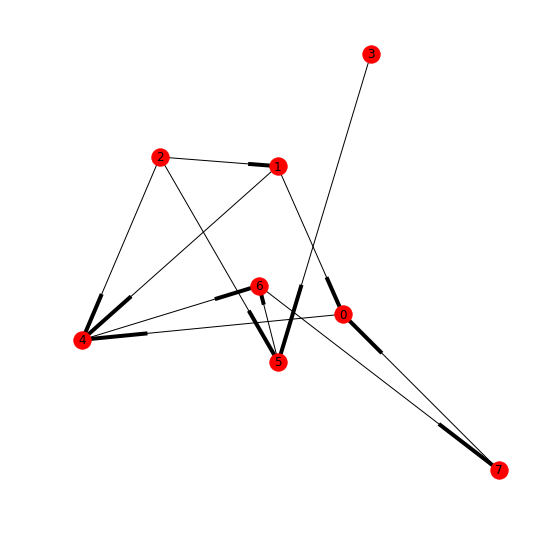

In [17]:
plot_graph(g2, 7)

In [18]:
powerIteration(g2, maxIterations=100, epsilon=0.0001, rsp=0.1)

0    0.228006
1    0.016250
2    0.012500
3    0.012500
4    0.228733
5    0.027500
6    0.243131
7    0.231380
dtype: float64

### 3

In [77]:
g3 = gen_matrix(1005)
read_graph("email-Eu-core.txt", g3)

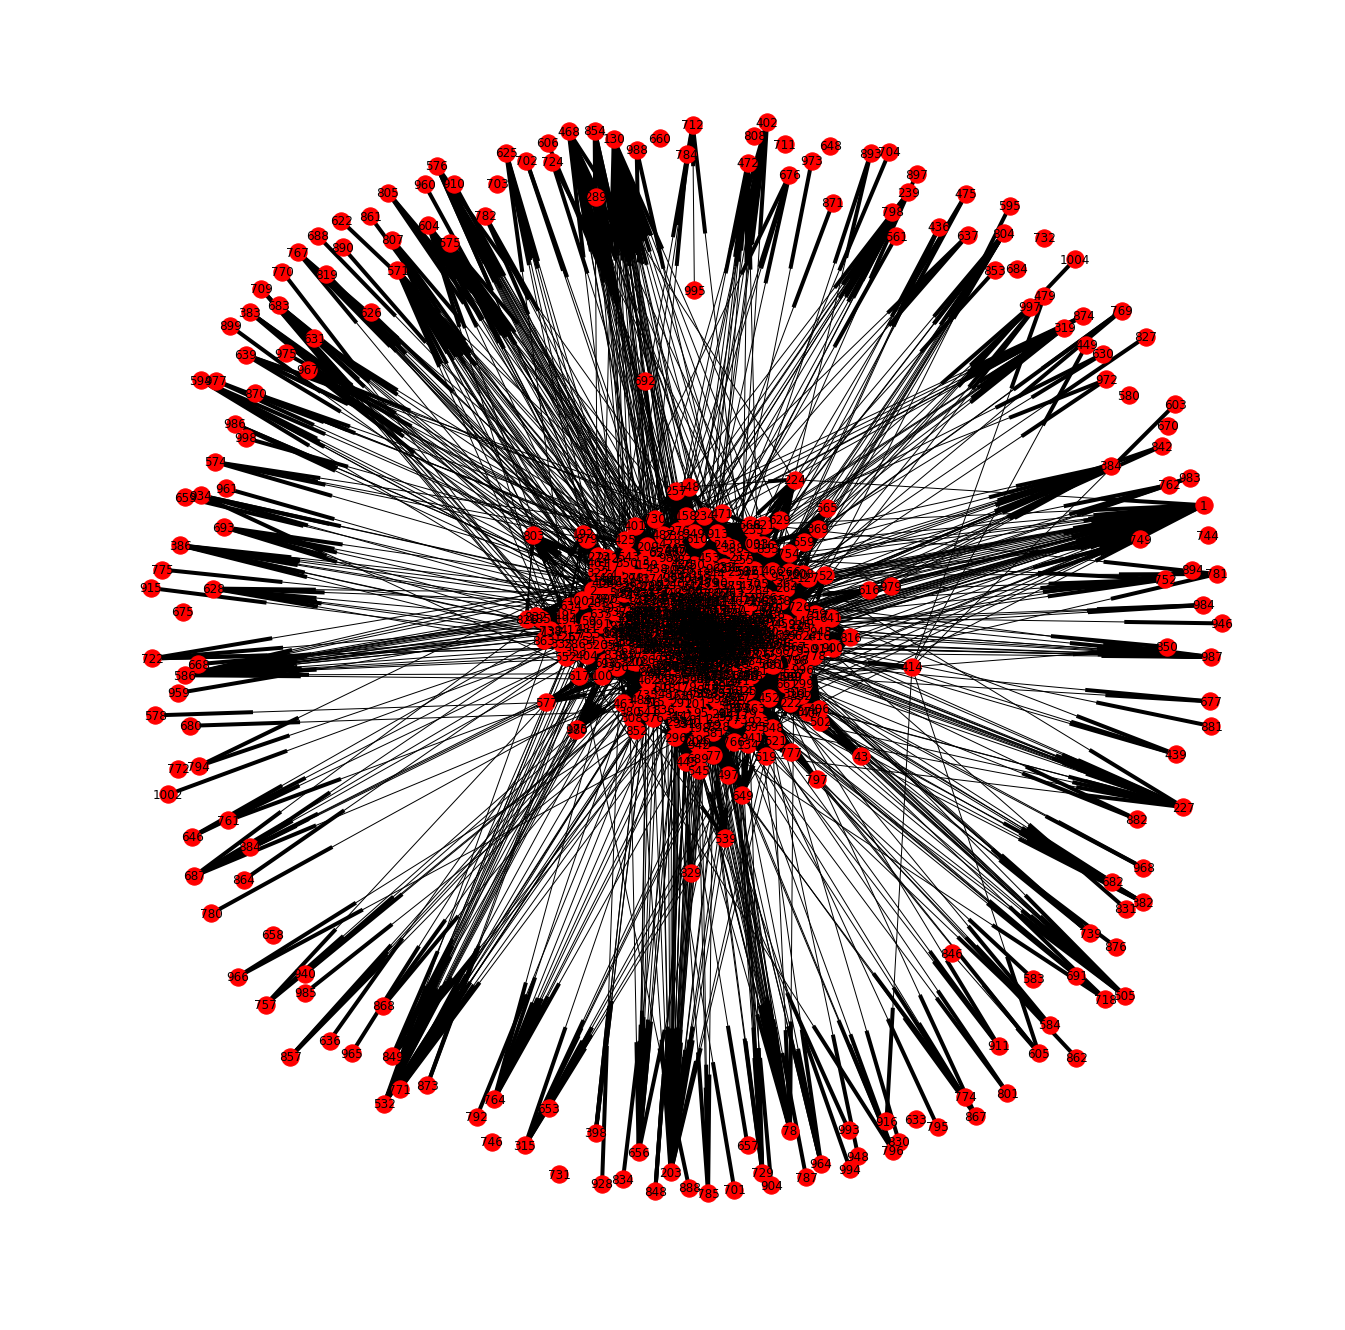

In [84]:
plot_graph(g3, 18)

In [103]:
rsp = [0.05, 0.1, 0.15, 0.35, 0.50, 0.6, 0.75, 0.85, 0.9]
res = []
for d in rsp:
    w = powerIteration(g3, maxIterations=1000, epsilon=0.00001, rsp=d)
    res.append((d, np.argmax(w), max(w)))

In [121]:
np.set_printoptions(suppress=True)
print(np.array(res)) # D, V, w[V]

[[   0.05          1.            0.0278119 ]
 [   0.1           1.            0.01473275]
 [   0.15          1.            0.00994345]
 [   0.35        160.            0.00553663]
 [   0.5         160.            0.00452992]
 [   0.6         160.            0.00384242]
 [   0.75        160.            0.00279281]
 [   0.85        160.            0.00208123]
 [   0.9         160.            0.00172177]]


### 4

In [27]:
m = read_max_from("Wiki-Vote.txt")
print(m)
g4 = gen_matrix(m+1)
read_graph("Wiki-Vote.txt", g4)

8297


In [25]:
#plot_graph(g4, 18)
import time

In [28]:
#rsp = [0.05, 0.15, 0.35, 0.50, 0.6, 0.75, 0.9]
rsp = [0.8]
res2 = []
for d in rsp:
    print(d)
    start = time.clock()
    w = powerIteration(g4, maxIterations=1, epsilon=0.001, rsp=d)
    end = time.clock()
    print("TIME : ", end - start)
    res2.append((d, np.argmax(w), max(w)))

0.8


KeyboardInterrupt: 

In [ ]:
np.set_printoptions(suppress=True)
print(np.array(res2)) # D, V, w[V]